In [1]:
import csv
import numpy as np

import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.io as pio
from matplotlib import pyplot as plt

def format_tool_id(tool_link):
        tool_id_split = tool_link.split( "/" )
        tool_id = tool_id_split[ -2 ] if len( tool_id_split ) > 1 else tool_link
        return tool_id

tool_usage_file = "data/tool_usage/tool-popularity.tsv"
tool_usage_dict = dict()
tool_list = list()
with open( tool_usage_file, 'rt' ) as usage_file:
    tool_usage = csv.reader(usage_file, delimiter='\t')
    for index, row in enumerate(tool_usage):
        tool_id = format_tool_id(row[0])
        tool_list.append(tool_id)
        if row[1] != '2019-03-01':
            if tool_id not in tool_usage_dict:
                tool_usage_dict[tool_id] = dict()
                tool_usage_dict[tool_id][row[1]] = int(row[2])
            else:
                curr_date = row[1]
                if curr_date in tool_usage_dict[tool_id]:
                    tool_usage_dict[tool_id][curr_date] += int(row[2])
                else:
                    tool_usage_dict[tool_id][curr_date] = int(row[2])
tool_list = list(set(tool_list))
print(len(tool_list))
print(tool_list)

1517
['ConsensusMapNormalizer', 'cshl_fastx_renamer', 'fastq_masker_by_quality', 't_test_two_samples', 'featurecounts', 'trimmomatic', 'poretools_yield_plot', 'hicexplorer_hictransform', 'gemini_load', 'DatamashOps', 'EMBOSS: equicktandem31', 'CONVERTER_fasta_to_bowtie_color_index', 'kallisto_quant', 'bedtools_mergebedgraph', 'align_and_estimate_abundance', 'gubbins', 'vcffixup', 'egsea', 'export2graphlan', 'goenrichment', 'secretbt2test', 'bedtools_getfastabed', 'mothur_clearcut', 'bowtie2', 'coords2clnt.py', 'trinity_super_transcripts', '__DATA_FETCH__', 'mothur_tree_shared', 'EMBOSS: etandem33', 'Show beginning1', 'bcftools_call', 'merge_metaphlan_tables', 'CONVERTER_bed_to_bgzip_0', 'tables_arithmetic_operations', 'bismark_pretty_report', 'CONVERTER_gff_to_bed_0', 'CONVERTER_fastq_to_fqtoc0', 'plotly_regression_performance_plots', 'Grouping1', 'MAF_Reverse_Complement_1', 'PicardInsertSize', 'vcfselectsamples', 'ip_binary_to_labelimage', 'MapAlignerPoseClustering', 'aragorn_trna', '

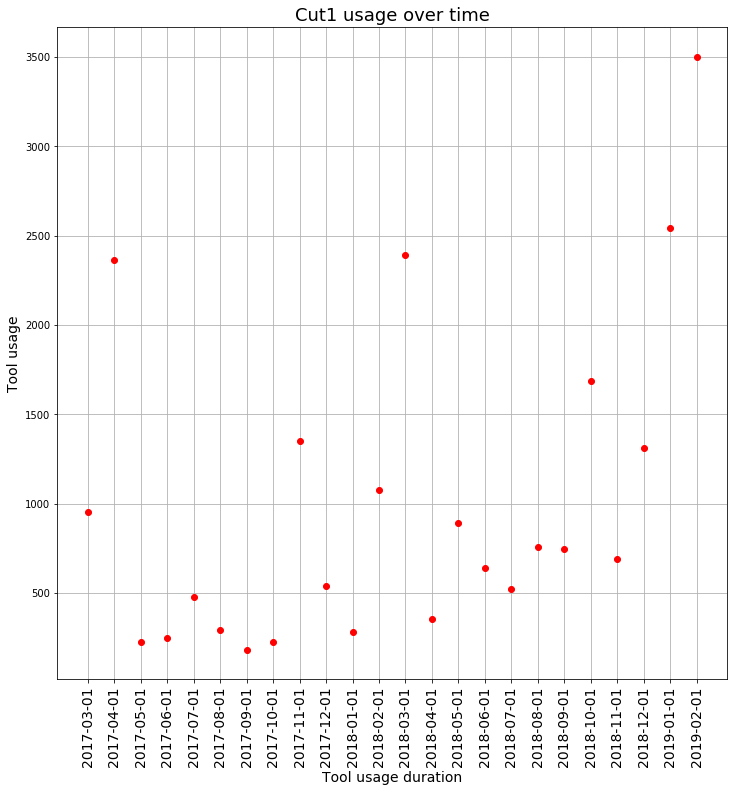

Polyfit: 3134
Inerp1d: 4464
Linear regression: 1672
Support vector regression: 718
-------------------------------------------------------


/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



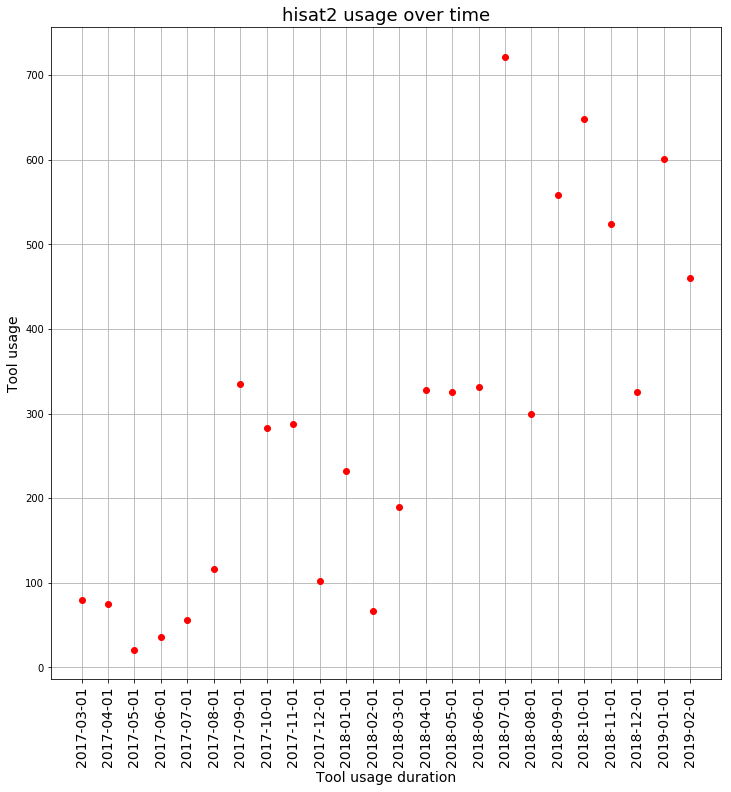

Polyfit: 500
Inerp1d: 319
Linear regression: 584
Support vector regression: 294
-------------------------------------------------------


/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



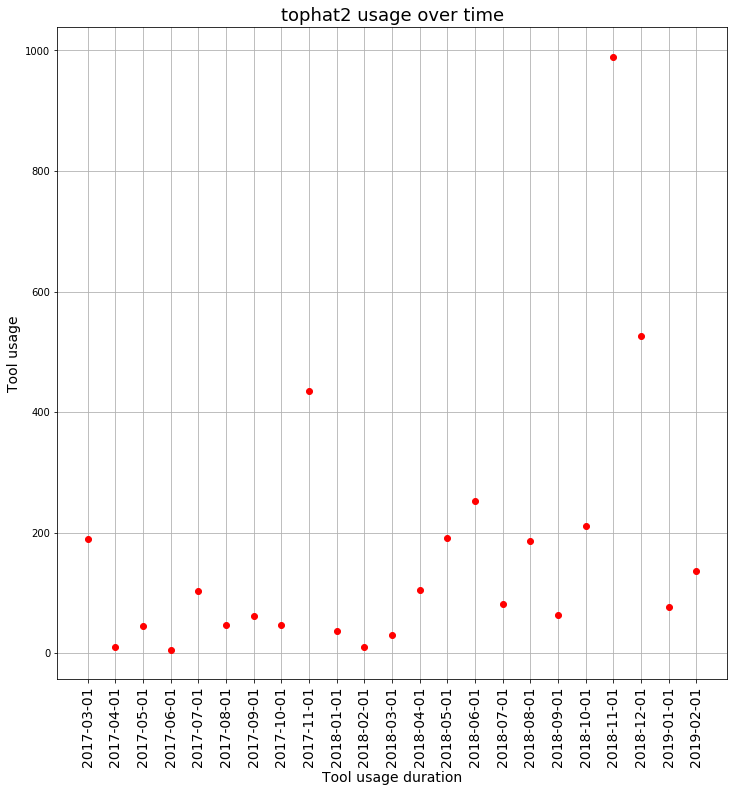

Polyfit: 278
Inerp1d: 195
Linear regression: 330
Support vector regression: 80
-------------------------------------------------------


/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



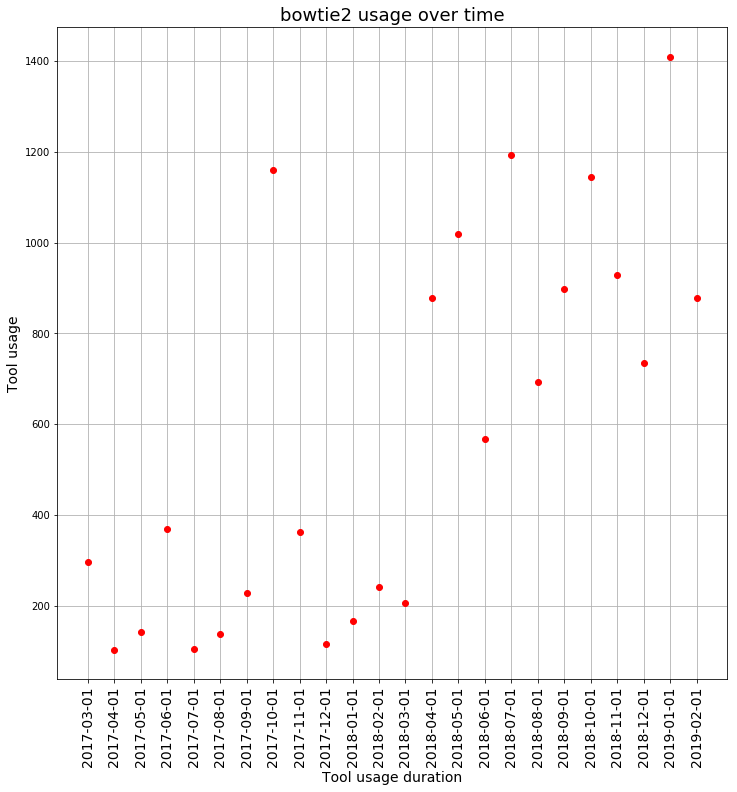

Polyfit: 1039
Inerp1d: 346
Linear regression: 1128
Support vector regression: 467
-------------------------------------------------------


/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kumara/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [22]:
from scipy import interpolate
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

size_title = 18
size_label = 14
n_pred = 2

def plot_hist(tool_name):
    y_val = []
    x_val = []
    tool_data = tool_usage_dict[tool_name]
    for x, y in tool_data.items():
        x_val.append(x)
        y_val.append(y)
    
    x_val = list(reversed(x_val))
    y_val = list(reversed(y_val))

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val))
    plt.plot(x_pos, y_val, 'ro')
    plt.xlabel('Tool usage duration', size=size_label)
    plt.ylabel('Tool usage', size=size_label)
    plt.xticks(range(len(x_val)), x_val, size=size_label, rotation='vertical')
    plt.title(('%s usage over time' % tool_name), size=size_title)
    plt.grid(True)
    plt.show()
    
    new_point = x_pos[-1] + 1
    
    '''poly = np.polyfit(x_pos, y_val, deg=3)
    y_ext_poly  = np.polyval(poly, new_point)
    print("Polyfit: %d" % y_ext_poly)
    
    func = interpolate.interp1d(x_pos, y_val, fill_value='extrapolate')
    y_ext_int = func(new_point)
    print("Inerp1d: %d" % y_ext_int)
    x_reshaped = x_pos.reshape(len(x_pos), 1)
    y_reshaped = np.reshape(y_val, (len(x_pos), 1))'''
    
    lr_model = LinearRegression().fit(x_reshaped, y_reshaped)
    new_point_res = np.array(new_point)
    new_point_res = np.reshape(new_point_res, (1, 1))
    lr_pred = lr_model.predict(new_point_res)
    print("Linear regression: %d" % lr_pred)
    
    svr_model = SVR().fit(x_reshaped, y_reshaped)
    new_point_res = np.array(new_point)
    new_point_res = np.reshape(new_point_res, (1, 1))
    svr_pred = svr_model.predict(new_point_res)
    print("Support vector regression: %d" % svr_pred)
    print("-------------------------------------------------------")

# plot tool usage over time
plot_hist('Cut1')
plot_hist('hisat2')
plot_hist('tophat2')
plot_hist('bowtie2')